 
<center><span style="color:darkred; font-size:3em; font:frutiger"> DATA CLEANING CON R </span> </center>       
  
  
  
  
  
  
  
  
<span style="color:darkblue;font: frutiger">Programación II</span>   


Mariela Lizeth Benavides Lázaro  
Ernesto René Monterroso Zamora  
Allan Fernando Santizo Flores  


<div class="pull-right"><img src="C:\Users\allan\Desktop\proyecto\dcs.png" width="400" height="400" /></div>




<center><img src="C:\Users\allan\Desktop\proyecto\dc.jpg" width="600" height="600" /></center>


<span style="color:darkred; font-size:1.5em; font:frutiger"> Referencia bibliográfica </span>
<div class="text-justify">
<span style="color:blue; font-size:0.5em"> https://cran.r-project.org/doc/contrib/de_Jonge+van_der_Loo-Introduction_to_data_cleaning_with_R.pdf </span></div>


<div class="pull-right"><img src="C:\Users\allan\Desktop\proyecto\portada.png" width="400" height="400" /></div>

<span style="color:darkred; font-size:1.5em; font:frutiger"> INTRODUCCIÓN </span>
<div class="text-justify">
El análisis de datos es un proceso de inspección, limpieza, transformación y modelado de datos con el objetivo de resaltar información útil, sugerir conclusiones y apoyar la toma de decisiones.</div>



<div class="text-justify"> Es poco probable que los datos sin procesar con los que se trabaja estén en el formato correcto, sin errores, completos y con las etiquetas y códigos correctos que se necesitan para su análisis. Por lo que, la limpieza de datos es considerada una parte esencial del análisis estadístico ya que se necesitará en la mayoría de casos transformar datos en bruto en datos consistentes para que puedan ser analizados.   </div>  



<div class="text-justify">En la práctica, a menudo lleva más tiempo que el análisis estadístico en sí. Por lo que, se describirán a continuación una variedad de técnicas, implementadas en el entorno estadístico R, proporcionando elementos para incluir en  scripts de limpieza de datos, para bases que sufren una amplia gama de errores e inconsistencias.    </div>  



<div class="text-justify">Entre los aspectos considerados se incluyen verificación de datos, localización de errores y una introducción a los métodos de imputación en R. Se presentan los problemas que comunmente es necesario resolver y la forma en que pueden abordarse utilizando distintos paquetes de R.   
</div>  

In [3]:
#Librerias
#install.packages("readxl")
library(readxl)
#install.packages("validate")
library(validate)
#install.packages("stringr")
library(stringr)
#install.packages("igraph")
library(igraph)
#install.packages("editrules")
library(editrules)
#install.packages("deducorrect")
library(deducorrect)
#install.packages("lattice")
library(lattice)
#install.packages("survival")
library(survival)
#install.packages("Formula")
library(Formula)
#install.packages("ggplot2")
library(ggplot2)
#install.packages("Hmisc")
library(Hmisc)
#install.packages("VIM")
library(VIM)
#install.packages("colorspace")
library(colorspace)
#install.packages("grid")
library(grid)
#install.packages("data.table")
library(data.table)
#install.packages("rspa")
library(rspa)

## 1. ASPECTOS GENERALES

<span style="color:darkred; font-size:1.5em; font:frutiger"> 1.1. Análisis Estadístico</span>

Se tratará el análisis estadístico como el resultado de una serie de pasos de procesamiento de datos donde cada paso aumenta el "valor de los datos".  
  
  
El proceso se reduce a un conjunto de pasos:

<center><img src="C:\Users\allan\Desktop\proyecto\diagrama.jpg" width="600" height="400" /></center>      

<span style="color:darkred; font-size:1.5em"> 1.2. Valores especiales a considerar en las bases de datos </span>
                                                     
<div class="text-justify">  
Como la mayoría de los lenguajes de programación, R tiene una serie de valores especiales que son excepciones avalores normales de un tipo específico. Estos son NA, NULL, ± Inf y NaN. Existen diferencias entre ellos que será necesario identificar al realizar tratamiento de datos.
</div>


* <div class="text-justify">   NA: utilizado para indicar datos no disponible, NA es un marcador de posición para un valor faltante. Todas las operaciones básicas en R manejan NA sin generar errores en su ejecución y en su mayoría devuelven NA como respuesta siempre que una de las entradas del argumento es NA. Es posible utilizar la función "is.na" para detectar valores faltantes.</div>


In [164]:
library(readxl)
ENEI20181P <- read_excel("C:/Users/IN_CAP02/Desktop/proyecto/ENEI20181P.xlsx")

In [6]:
d= ENEI20181P$PPA11
b <- cbind(1,nrow(ENEI20181P))

for (i in 1:nrow(ENEI20181P))
    {
    a=is.na(d[i])
    b[i]=a
        }

cat("La cantidad de NA en PPA11 es: ", sum(b))


La cantidad de NA en PPA11 es:  13321

* <div class="text-justify"> NULL : Se puede pensar en este tipo de valores como el conjunto vacío de las matemáticas. NULL es especial ya que no tiene clase (su clase es NULL) y tiene una longitud 0, por lo que no ocupa espacio en un vector.  Es posible utilizar la función "is.null" para detectar variables NULL. </div>


In [7]:
length(c(1, 2, NULL, 4))

[1] 3

* <div class="text-justify"> Inf : hace referencia al infinito y solo se aplica a vectores de clase numérica. Un vector de clase entero no puede ser inf, en R Inf esta derivada únicamente para flotantes.   Técnicamente, Inf es un valor numérico válido que resulta de cálculos como la <span style="color:red"> división de un número por cero. </span> Como Inf es un valor numérico, las operaciones entre Inf y un número finito están bien definidos y los operadores de comparación funcionan como se espera </div>

In [8]:
#Siendo P04C10 = Salario, P04C30= Tiempo de trabajo

M= ENEI20181P$P04C10 / ENEI20181P$P04C30
M[1:15]

[1] 250.0000       NA 983.3333       NA      Inf      Inf       NA       NA
 [9]       NA       NA      Inf       NA 750.0000 114.8148       NA

* <div class="text-justify"> Nan: Indica que no hay un número. Este es generalmente el resultado de un cálculo cuyo resultado es
desconocido, pero seguramente no es un número. En operaciones particulares como <span style="color:red"> 0/0 </span>, Inf-Inf y Inf / Inf resulta en NaN. Técnicamente, NaN es de clase numérica, lo que puede parecer extraño ya que se usa para indicar que algo no es numérico. Cálculos que involucran números y NaN siempre da como resultado NaN. Es posible utilizar la función "is.nan" para detectar Nan's. </div>

In [9]:
#Siendo PPA11 = cantidad de hijos , P04C30= nivel educativo


A= ENEI20181P$PPA11 / ENEI20181P$P04C30
A[145:150]

[1] 0.06666667         NA        NaN         NA 0.06666667         NA

## 2. Información bruta $\to$ Datos técnicamente correctos  
  
<span style="color:darkred; font-size:1.5em; font:frutiger"> 2.1 Datos técnicamente correctos en R</span>

  
 El ambiente de R es capaz de leer y procesar distintas bases de datos de diferentes archivos. Vamos a referirnos a datos técnicamente correctos a aquellos que cumplen lo siguiente:  
 
 1. Está resguardada en un DataFrame con columnas nombradas,
 2. Cada columna del DataFrame es el tipo de R que mejor representa el valor dominante de las variables de la columna.  
 
Antes de empezar a transformar los datos, es recomendable hacer una rápida inspección de los mismos, para lo cual se pueden utilizar las siguientes funciones

In [ ]:
#install.packages("validate")
#install.packages("dplyr")
library(readxl)
library(validate)
library(stringr)

In [10]:
archivo <- read_xlsx("C:/Users/IN_CAP02/Desktop/proyecto/ENEI20181PO.xlsx")
#lectura del archivo de excel, cuyos datos serán utilizados para una rápida inspección.
class(archivo) # se consulta la clase del archivo
dim(archivo)   # se consulta la dimensión del archivo, primero filas y segundo columnas
names(archivo[1:20]) # se consulta el nombre de las columnas del archivo

[1] "tbl_df"     "tbl"        "data.frame"

[1] 22310   265

[1] "DOMINIO"          "AREA"             "UPM"              "Factor_expansion"
 [5] "NUM_HOGAR"        "ID"               "PPA02"            "PPA03"           
 [9] "PPA04A"           "PPA04B"           "PPA04C"           "PPA05"           
[13] "PPA06"            "PPA07"            "PPA08"            "PPA09"           
[17] "PPA10A"           "PPA10B"           "PPA11"            "PPA12"

In [11]:
str(archivo$PPA04A)     # muestra de manera compacta la estructura del DataFrame
summary(archivo$PPA04A) # muestra un resumen con datos estadísticos del DataFrame

 num [1:22310] 13 6 25 5 30 13 29 22 28 16 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    8.00   15.00   15.24   22.00   31.00 

In [12]:
head(archivo, n=3)  # muestra las primeras n filas del DataFrame
tail(archivo, n=3)  # muestra las últimas n filas del DataFrame

DOMINIO,AREA,UPM,Factor_expansion,NUM_HOGAR,ID,PPA02,PPA03,PPA04A,PPA04B,...,P05A21A,P05A21B,ETNICIDAD,PET,PEA,OCUPADOS,DESOCUPADOS,SUBVISIBLES,INACTIVOS,FORMAL_INFORMAL
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,217,1,1,1,65,13,8,...,2,NA,2,1,1,1,NA,NA,NA,1
1,1,1,217,1,2,2,67,6,11,...,NA,NA,2,1,1,1,NA,NA,NA,1
1,1,1,217,1,3,1,23,25,4,...,NA,NA,2,1,1,1,NA,NA,NA,2


DOMINIO,AREA,UPM,Factor_expansion,NUM_HOGAR,ID,PPA02,PPA03,PPA04A,PPA04B,...,P05A21A,P05A21B,ETNICIDAD,PET,PEA,OCUPADOS,DESOCUPADOS,SUBVISIBLES,INACTIVOS,FORMAL_INFORMAL
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,2,363,842,5190,2,2,34,24,7,...,NA,NA,1,1,1,1,NA,NA,NA,1
3,2,363,842,5190,3,2,2,18,4,...,NA,NA,1,NA,NA,NA,NA,NA,NA,NA
3,2,363,842,5191,1,2,65,6,6,...,2,NA,2,1,NA,NA,NA,NA,1,NA


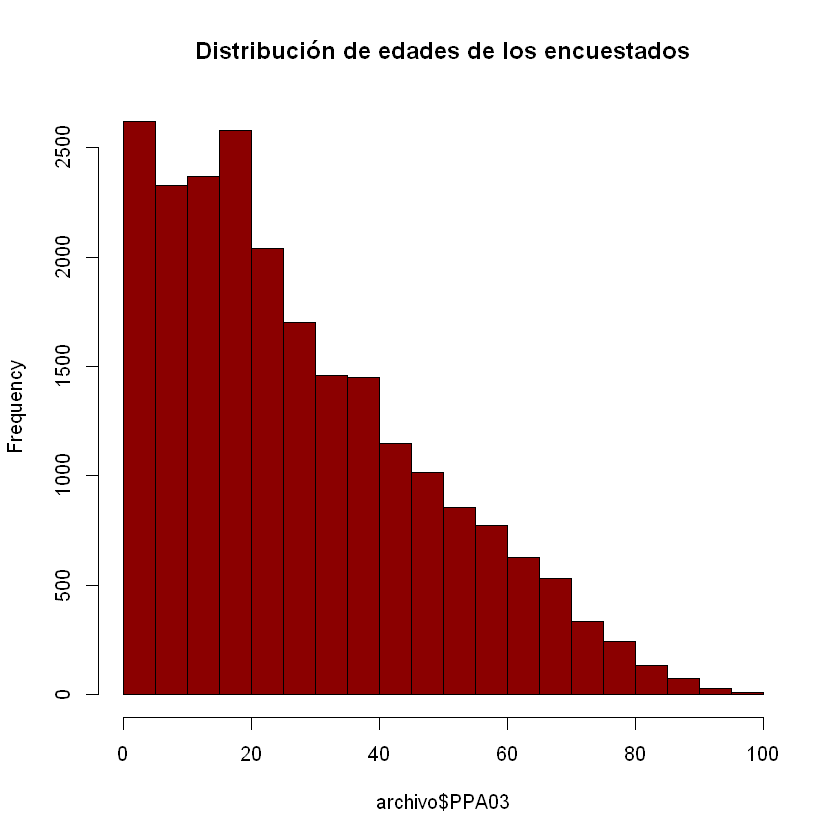

In [13]:
hist(archivo$PPA03, main="Distribución de edades de los encuestados", col="Darkred") # Un histograma de los datos

<span style="color:darkred; font-size:1.5em; font:frutiger"> 2.2 Convertir el tipo de los elementos </span>


Convertir una variable de un tipo a otro se llama coerción. Al momento de importar un archivo, R intentará determinar la clase según los datos de cada columna, a menos que se le indique desde un principio el tipo al que debe pertenecer.

In [14]:
clases = sapply(archivo, class)
# Con este comando se puede verificar el tipo de elemento por cada columna
sum(clases=="numeric")
# Si se tienen demasiadas columnas, es mejor confirmar que todas tengan el tipo deseado
sum(clases=="logical")
# se determinó que varias columnas no tienen el tipo deseado

[1] 256

[1] 9

In [16]:
ENEI20181P <- read_xlsx("C:\\Users\\IN_CAP02\\Desktop\\proyecto\\ENEI20181PO.xlsx", col_types = "numeric")
# Se indica el tipo de columnas, para que R entienda cómo deseamos la información
sum(sapply(ENEI20181P, class)=="numeric")
# El número de variables de clase numerica, coincide con el total de columnas del archivo

[1] 265

 <span style="color:darkred; font-size:1.5em; font:frutiger"> 2.3 Validación de Datos </span>

  
  <div class="text-justify"> Esta se refiere a la actividad de verificar si un conjunto de datos cumple ciertas condiciones. Por ejemplo, si se tiene información de salarios, no se esperaría encontrar datos negativos, por lo que es una herramienta útil de aplicar para corroborar los datos que se van a procesar.  
Las condiciones a probarse pueden ser combinadas, y dependerán del tipo de información con la que se cuenta.</div>

In [17]:
migracion <- read.csv("C:\\Users\\IN_CAP02\\Desktop\\proyecto\\MIGRACION_BDP.csv")

reglas <- validator(DEPARTAMENTO>0,MUNICIPIO>0,COD_MUNICIPIO>0,ZONA>0,AREA>0,NUM_VIVIENDA>0,
                    NUM_HOGAR>0, ID_EMIGRACION>0, PEI3>0, PEI4>=0, PEI5>2000)
# comando para crear reglas
confront(migracion,reglas)
# comando para aplicar las reglas a las columnas

Object of class 'validation'
Call:
    confront(dat = migracion, x = reglas)

Confrontations: 11
With fails    : 0
Warnings      : 0
Errors        : 0

 <span style="color:darkred; font-size:1.5em; font:frutiger">  2.4 Factores de Recodificación  </span>


<div class="text-justify"> En algunas bases de datos, el valor de ciertas variables categóricas se almacena en un factor variable. Un factor es un vector de enteros con una tabla especificando el valor de entero correspondiente a cada nivel.  
Por ejemplo, en la base de datos "Migracion" se encuentra la columna "PEI3" que almacena el género de los individuos con los valores 1 y 2. El 1 es para Masculino y el 2 para Femenino. Si en lugar de mostrar 1 y 2, se desea mostrar el texto "masculino" y "femenino", se puede recodificar la DataFrame como se mostrará a continuación:</div>

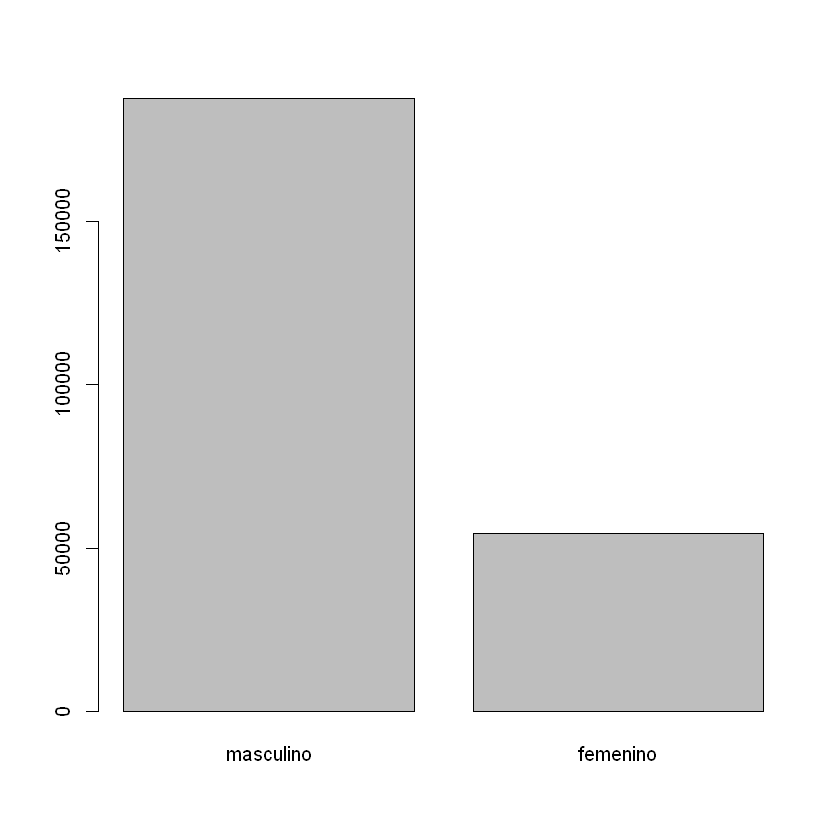

In [18]:
recode <- c(masculino = 1, femenino = 2)
migracion$PEI3 = factor(migracion$PEI3, levels = recode, labels = names(recode))
plot(migracion$PEI3)

<span style="color:darkred; font-size:1.5em; font:frutiger">  2.5 Otras funciones para transformar texto  </span>


In [19]:
str_trim("  hello world  ") # elimina los espacios que están antes y después de la cadena de texto
str_trim("  hello world  ", side="right") # elimina los espacios que están después de la cadena de texto
str_trim("  hello world  ", side="left") # elimina los espacios que están están de la cadena de texto
str_pad(112, width = 6, side = "left", pad = 0) # modifica el texto al largo deseado
toupper("Hello world") # texto en mayúsculas
tolower("Hello World") # texto en minúsculas

[1] "hello world"

[1] "  hello world"

[1] "hello world  "

[1] "000112"

[1] "HELLO WORLD"

[1] "hello world"

In [20]:
genero <- c("M", "masculino ", "Femenino", "fem.")
grepl("m", genero) # indica si los elementos contienen el caracter indicado
grep("m", genero)  # indica el índice del elemento que contenga el caracter indicado
grepl("m", tolower(genero)) # Se pueden usar funciones modificando la cadena de texto a evaluar
grepl("^m", genero, ignore.case = TRUE) 
# con el caracter ^ se le indica a la función que busque en el primer caracter de cada elemento.

[1] FALSE  TRUE  TRUE  TRUE

[1] 2 3 4

[1] TRUE TRUE TRUE TRUE

[1]  TRUE  TRUE FALSE FALSE

## 3. Datos técnicamente correctos $\to$ Datos consistentes


<div class="text-justify">Los datos consistentes son datos técnicamente correctos que son aptos para el análisis estadístico. Son datos en los que se eliminan, corrigen o imputan valores perdidos, valores especiales, errores (obvios) y valores atípicos. Los datos son consistentes con las restricciones basadas en el conocimiento del mundo real sobre el tema que describen los datos.</div>  

El proceso para contar con datos consistentes siempre implica los siguientes tres pasos.

1. **Detección** de una inconsistencia. Es decir, uno establece qué restricciones son violadas. Por ejemplo, una variable de edad está limitada a valores no negativos.

2. **Selección** del campo o campos que causan la inconsistencia. Esto es trivial en el caso de una demanda univariante como en el paso anterior, pero puede ser más engorroso cuando se espera que se mantengan las relaciones entre variables. Por ejemplo, el estado civil de un hijo debe ser soltero. En el caso de una violación, no está claro de inmediato si la edad, el estado civil o ambos están equivocados.

3. **Corrección** de los campos que el método de selección considera erróneos. Esto puede hacerse a través de métodos deterministas (basados en modelos) o estocásticos.
    

<span style="color:darkred; font-size:1.5em"> 3.1 Detección y localización de errores. </span>

### 3.1.1 Valores perdidos o faltantes

Un valor faltante, representado por NA en R, es un marcador de posición para un dato cuyo tipo es conocido pero su valor no lo es. Por lo tanto, es imposible realizar un análisis estadístico en los datos donde faltan uno o más valores en los datos. Se puede optar por omitir elementos de un conjunto de datos que contienen valores faltantes o imputar un valor, pero la falta es algo que debe abordarse antes de cualquier análisis.

In [21]:
# libreria "readxl" 
library(readxl)

# Archivo xlsx
BASE <- read_excel("C:/Users/IN_CAP02/Desktop/proyecto/ENEI20181P.xlsx",sheet="Sheet1")

In [22]:
#No es posible hacer cálculos con valores perdidos.
mean(BASE$PPA10B)

#Es necesario utilizar la función base na.rm.
mean(BASE$P04C10,na.rm = TRUE)

[1] NA

[1] 2501.946

In [23]:
#La siguiente función nos ayuda a identificar valores "NA".
is.na(BASE$PPA10B)[1:5]

[1]  TRUE  TRUE  TRUE  TRUE FALSE

In [24]:
#La siguiente función determina que si alguna fila de la base de datos tiene valores perdidos.
complete.cases(BASE$PPA10B)[1:10]

[1] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE

In [25]:
#La siguiente función omite de la base de datos las filas con valores omisos.
head((a <- na.omit(BASE$PPA10B)),20)

#La siguiente función muestra que filas fueron extraídas de la base de datos.
head(na.action(a),20)

[1] 1 1 1 2 2 2 2 2 2 2 2 3 1 3 1 1 1 4 2 2

[1]  1  2  3  4  8  9 10 14 15 21 22 23 26 28 29 30 31 32 37 38

### 3.1.2 Valores especiales

Los cálculos que involucran valores especiales a menudo resultan en valores especiales, y dado que una afirmación estadística sobre un fenómeno del mundo real nunca debe incluir un valor especial, es deseable manejar valores especiales antes del análisis.


In [26]:
# La función is.finite determina qué valores son valores 'regulares'.
is.finite(BASE$PPA10B)[1:30]

[1] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE
[13]  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE
[25]  TRUE FALSE  TRUE FALSE FALSE FALSE

In [27]:
#la siguiente función puede usarse para verificar cada columna numérica en un marco de datos.
is.special <- function(x){
    if (is.numeric(x)) !is.finite(x) else is.na(x)
}
head(is.special(BASE),5)

No,DOMINIO,AREA,UPM,Factor_expansion,NUM_HOGAR,ID,PPA02,SEXO,PPA03,...,P05A21A,P05A21B,ETNICIDAD,PET,PEA,OCUPADOS,DESOCUPADOS,SUBVISIBLES,INACTIVOS,FORMAL_INFORMAL
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE


### 3.1.3 Valores atípicos
Existe una gran cantidad de literatura sobre detección de valores atípicos, y existen varias definiciones de valores atípicos. Una definición general de Barnett y Lewis define un valor atípico en un conjunto de datos como una observación (o conjunto de observaciones) que parece ser inconsistente con ese conjunto de datos.

La instalación base R viene con la función boxplot.stats, que, entre otras cosas, enumera los valores atípicos.

In [28]:
# La siguiente función determina datos átipicos
boxplot.stats(BASE$P04C10)$out

[1]  7000  8000  8000  7000  7000  8000 10000  9000  7000  9000  8000 15000
 [13]  6000 10300 10000 15000  7000  7000  9000  8000  6100  6000  9000  7000
 [25]  7000  8200  6500  7000  7000 10000  9000  9000  9000 10000  8000 20000
 [37]  7000  8000  6000  6000  7000  7000 10000 12000  8000 11000  7000  7000
 [49] 12000  9000  8000 35000 15000 10000  8000  7000  8000  7500  7000 10000
 [61] 10000  8000  8000  7000  7000  8000  9500  8000  6000 50000  8000  9000
 [73]  9000  8500  9000  6000  6000  8000  7000  8000  7000 15000 10000  6500
 [85] 10000  7000 10000  7500  6500  6500  6200 12000  7000 10000  6000 10000
 [97] 10000  6500 10000 10000  6000  6000 10000  9000 10000  6000  9000  5900
[109]  6000  6150  6000 12000 10422  6000  6000 12000  7500  6000 10000 10000
[121]  7000 13000 12000  6000 10000 10000  6000  9300  6000  5900  6000  8000
[133] 12000  8000  6000 12000  8000  6000  6000  7000  9000  8000  7300  6000
[145]  6000  6000  6000  8000 10000  6000  8000  7200  7000 10000 11000  6000
[157] 17000  8000  7000  6000  6500  7000  6000  7000  7200  7000  7000  9000
[169]  6500  7000  7000  7000  8000 10000  7000  9000  6000  6000 10000  6000
[181] 11000 10000  8000 15000  6900 25000 15000  8000 10000 14000  7000 11000
[193]  5779 12000  9000  6000  6000 10000  8000  7000  8000 10000  8000 10000
[205]  7000  7000  8000  7000  9000  6000 15000  7000 12000  6000  8000 10000
[217]  7200  8000  6680 13000  7000  6000  7292 10000  6300 12000  8203  6380
[229]  7000  8800  5800  6000  6000  6000  7200  7000  6000  6500 25000  6000
[241]  6000  7000  8000  8000  6000  8000  8000  6000  6600  8000  5800  8000
[253]  6500  7400  7200  8712  6600  5800  5800  8500  6587  6300  6000  7220
[265]  5750  6300  8000  8000  6000  5800  7210  8000  6000  7000  5800  6000
[277]  6000  7000  6000  7000  6225  7100  8500  6000  8000  6300  8203  6000
[289]  8000  7260  7260  6000  6000  8000 14000  6380  7000  8000 10000  6000
[301]  6000 12000  8500 11000  6000  7000  6000  5800  8000  6000  7203 10000
[313]  6000  6580  7200 11300  6000  8000  6000

In [29]:
# Pueden modificarse las condiciones del Boxplot, un coeficiente más alto significa un límite de detección de valores atípicos más altos.
boxplot.stats(BASE$P04C10, coef=3)$out

[1] 10000  9000  9000 15000 10300 10000 15000  9000  9000 10000  9000  9000
[13]  9000 10000 20000 10000 12000 11000 12000  9000 35000 15000 10000 10000
[25] 10000  9500 50000  9000  9000  8500  9000 15000 10000 10000 10000 12000
[37] 10000 10000 10000 10000 10000 10000  9000 10000  9000 12000 10422 12000
[49] 10000 10000 13000 12000 10000 10000  9300 12000 12000  9000 10000 10000
[61] 11000 17000  9000 10000  9000 10000 11000 10000 15000 25000 15000 10000
[73] 14000 11000 12000  9000 10000 10000 10000  9000 15000 12000 10000 13000
[85] 10000 12000  8800 25000  8712  8500  8500 14000 10000 12000  8500 11000
[97] 10000 11300

### 3.1.4 Inconsistencias obvias
Una inconsistencia obvia ocurre cuando un registro contiene un valor o una combinación de valores que no pueden corresponder a una situación del mundo real. Por ejemplo, la edad de una persona no puede ser negativa, un hombre no puede estar embarazado y una persona menor de edad no puede poseer una licencia de conducir.

La comprobación de inconsistencias obvias se puede hacer directamente en R usando índices lógicos y reciclaje. Por ejemplo, para verificar qué elementos de x obedecen la regla `x no debe ser negativa ', simplemente se usa lo siguiente.

In [30]:
# La siguiente verificación se realiza con verificaciones lógicas

x_nonnegative <- BASE$PPA03 >= 0
print(x_nonnegative[1:10])

 [1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE


#### Edit Rules
<div class="text-justify"> El paquete editrules permite definir reglas sobre conjuntos de datos categóricos, numéricos o de tipo mixto que cada registro debe obedecer. Además, editrules puede verificar qué reglas se obedecen y permite encontrar el conjunto mínimo de variables para adaptarlas de modo que se puedan obedecer todas las reglas. El paquete también implementa una serie de operaciones básicas de reglas que permiten a los usuarios probar conjuntos de reglas en busca de contradicciones y ciertas redundancias.</div>

In [31]:
#install.packages("editrules")
library(editrules)

#install.packages("igraph")
library(igraph)

In [32]:
# La siguiente condición verifica que el campo año de nacimiento contenga valores "consistentes". 
(edad <- editset(c("PPA04C >=1939", "PPA04C <= 2018")))
#(activo <- editset(c("PPA04C >=2012", "PEA != NA")))

va <- violatedEdits(edad, BASE)
summary(va)


Edit set:
num1 : 1939 <= PPA04C
num2 : PPA04C <= 2018 

Edit violations, 22310 observations, 0 completely missing (0%):

 editname freq  rel
     num1  313 1.4%

Edit violations per record:

 errors  freq   rel
      0 21997 98.6%
      1   313  1.4%


In [33]:
# Las reglas pueden ser consignadas en un archivo de texto
reglas <- editfile("C:/Users/IN_CAP02/Desktop/proyecto/Reglas.txt")
ve<- violatedEdits(reglas,BASE)
summary(ve)

Edit violations, 22310 observations, 0 completely missing (0%):

 editname freq  rel
     mix2  344 1.5%

Edit violations per record:

 errors  freq   rel
      0 21966 98.5%
      1   344  1.5%


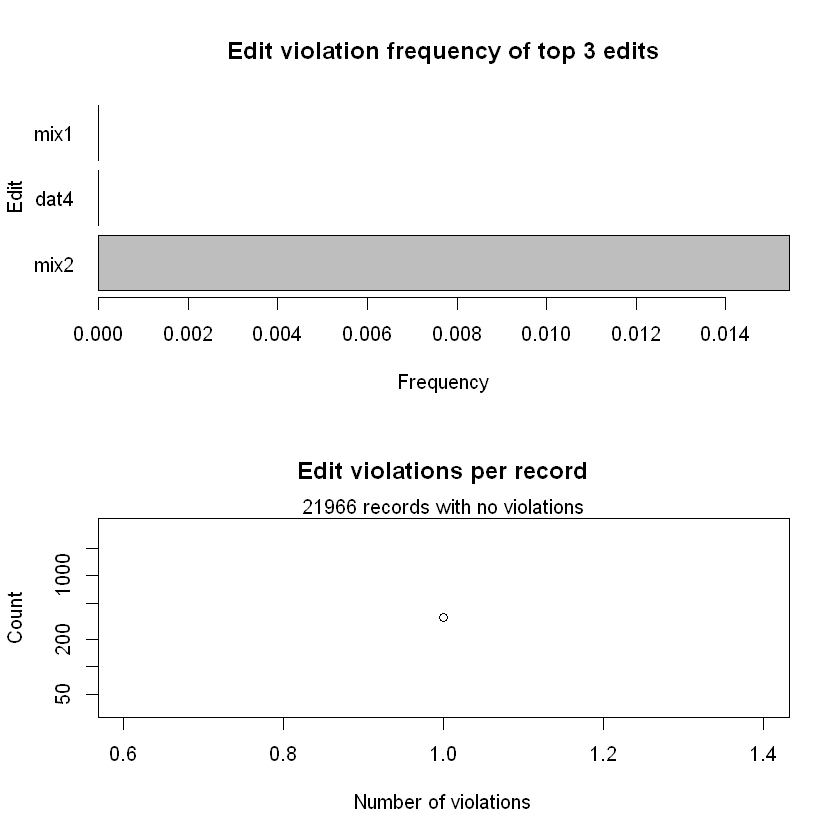

In [34]:
plot(ve)

### 3.1.5 Error de localización
La interconectividad de las ediciones es lo que hace que la localización de errores sea difícil. Supongamos que modificamos algún campo para que no se viole una regla. Luego corremos el riesgo de violar otras ediciones que contengan edad.

In [36]:
id <- c(2,12328)
violatedEdits(edad, BASE[id,])
le <- localizeErrors(edad, BASE[id, ], method = "mip")

      edit
record  num1  num2
     1 FALSE FALSE
     2  TRUE FALSE

In [37]:
le <- localizeErrors(edad, BASE[id, ], method = "mip")
le$adapt

,No,DOMINIO,AREA,UPM,Factor_expansion,NUM_HOGAR,ID,PPA02,SEXO,PPA03,...,P05A21A,P05A21B,ETNICIDAD,PET,PEA,OCUPADOS,DESOCUPADOS,SUBVISIBLES,INACTIVOS,FORMAL_INFORMAL
1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE



<span style="color:darkred; font-size:1.5em">3.2 Corrección </span>  

Los métodos de corrección apuntan a fijar observaciones inconsistentes al alterar valores no válidos en un registro basado en información de valores válidos. Dependiendo del método, este es un procedimiento de un solo paso o un procedimiento de dos pasos donde primero se usa un método de localización de errores para vaciar ciertos campos, seguido de un paso de imputación.

In [39]:
(estaturas <- read.csv("C:\\Users\\IN_CAP02\\Desktop\\proyecto\\HNOS.csv", stringsAsFactors = FALSE))

name,height,unit
<chr>,<dbl>,<chr>
Diego,120.00,cm
Domingo,1.30,m
Pablo,75.00,inch
Elmer,125.00,cm
Polo,6.01,ft


### 3.2.1 Reglas simples de transformación
<div class="text-justify"> En la práctica, los procedimientos de limpieza de datos implican muchas transformaciones ad-hoc. Esto puede conducir a grandes secuencias de comandos en las que se seleccionan partes de los datos, se modifican algunas variables, se selecciona otra parte, se modifican algunas variables más, etc. Sin embargo, a medida que los scripts se alargan, es mejor almacenar las reglas de transformación por separado y registrar qué regla se ejecuta en qué registro. El paquete deducorrect ofrece funcionalidad para esto.</div>

In [40]:
#install.packages("deducorrect")
library(deducorrect)

In [42]:
R <- correctionRules("C:\\Users\\IN_CAP02\\Desktop\\proyecto\\conversiones.txt")
cor <- correctWithRules(R, estaturas)
cor$corrected

name,height,unit
<chr>,<dbl>,<chr>
Diego,1.200000,m
Domingo,1.300000,m
Pablo,1.905004,m
Elmer,1.250000,m
Polo,1.832317,m


### 3.2.2 Correción deductiva

<div class="text-justify"> Cuando los datos que está analizando son generados por personas en lugar de máquinas, es probable que ocurran ciertos errores típicos generados por humanos. Dado que los datos deben obedecer ciertas reglas de edición, la ocurrencia de tales errores a veces se puede detectar a partir de datos sin procesar con certeza. Ejemplos de errores que se pueden detectar son errores de tipeo en números, errores de redondeo en números y errores de signos de variables. El paquete deducorrect tiene varias funciones disponibles que pueden corregir dichos errores.</div>

In [43]:
e <- editmatrix("x + y == z")
d <- data.frame(x = 100, y = -100, z = 200)
cor <- correctSigns(e, d)
cor$corrected
cor$corrections

x,y,z
<dbl>,<dbl>,<dbl>
100,100,200


row,variable,old,new
<int>,<fct>,<dbl>,<dbl>
1,y,-100,100


In [49]:
e <- editmatrix("x + y == z")
d <- data.frame(x = 123, y = 132, z = 246)
cor <- correctTypos(e, d)
cor$corrected
cor$corrections

x,y,z
<dbl>,<dbl>,<dbl>
123,123,246


row,variable,old,new
<dbl>,<fct>,<dbl>,<dbl>
1,y,132,123


### 3.2.3 Imputación determinística
En algunos casos, se puede determinar un valor faltante porque los valores observados combinados con sus restricciones fuerzan una solución única.

In [53]:
E <- editmatrix(expression(
staff + cleaning + housing == total,
staff >= 0,
housing >= 0,
cleaning >= 0
))

In [60]:
datos <- data.frame(
staff = c(100,100,100),
housing = c(NA,50,25),
cleaning = c(NA,NA,NA),
total = c(100,180,200)
)
cor <- deduImpute(E,datos)
cor$corrected

staff,housing,cleaning,total
<dbl>,<dbl>,<dbl>,<dbl>
100,0,0,100
100,50,30,180
100,25,75,200


<span style="color:darkred; font-size:1.5em"> 3.3. Imputación </span>

La imputación es el proceso de estimar o derivar valores para campos donde faltan datos.

### 3.3.1 Modelos básicos de imputación numérica

A continuación vamos a revisar algunos modelos de imputación numérica.

Imputación a tráves de la media: 

<center>$\widehat{x}_{i} = \overline{x} $</center>

<justify>donde $\widehat{x}_{i}$ es el valor de imputación y se toma la media sobre los valores observados. La utilización de este modelo es limitada ya que obviamente causa un sesgo en las medidas de generalización estimadas a partir de la muestra después de la imputación.</justify>

In [65]:
#Con el paquete base podemos imputar datos con las siguientes funciones
BASE$P04C10[is.na(BASE$P04C10)] <- mean(BASE$P04C10,na.rm = TRUE)
BASE$P04C10[1:20]

[1] 2500.000 2501.946 2950.000 2501.946 1400.000 2900.000 2501.946 2501.946
 [9] 2501.946 2501.946 7000.000 2501.946 3000.000 3100.000 2501.946 3000.000
[17] 2900.000 2501.946 2501.946 2501.946

In [66]:
#install.packages("Hmisc")

library(lattice)
library(survival)
library(Formula)
library(ggplot2)
library(Hmisc)


In [68]:
# Utilizando la libreria Hmisc
imputm <- impute(BASE$P04C10, fun = mean) # media
imputme <- impute(BASE$P04C10, fun = median) # mediana
imputm[1:30]

[1] 2500.000 2501.946 2950.000 2501.946 1400.000 2900.000 2501.946 2501.946
 [9] 2501.946 2501.946 7000.000 2501.946 3000.000 3100.000 2501.946 3000.000
[17] 2900.000 2501.946 2501.946 2501.946 2501.946 2501.946 2501.946 8000.000
[25] 2501.946 2501.946 2501.946 8000.000 2501.946 2501.946

El siguiente modelo numérico que tratamos son modelos de regresión lineal (generalizados). En tales modelos, los valores faltantes se imputan de la siguiente manera:

<center> $\widehat{x}_{i} = \widehat{\beta}_{0} + \widehat{\beta}_{1}y_{1,i} + ... + \widehat{\beta}_{k}y_{k,i}$</center>

Donde $  \widehat{\beta}_{0}  $$  ,\widehat{\beta}_{1}y_{1,i}  $$  ...  $$  \widehat{\beta}_{k}y_{k,i}  $ se calculan los coeficientes de regresión lineal para cada una de las variables auxiliares $ y_{1},y_{2}...,y_{k}.  $. Calcular modelos lineales es bastante fácil usando lm y predecir en el paquete base de R.

In [87]:
head(read.csv("C:\\Users\\IN_CAP02\\Desktop\\proyecto\\iris.csv"),20)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6.4,3.2,4.5,1.5,versicolor
2,6.3,3.3,6.0,2.5,virginica
3,6.2,NA,5.4,2.3,virginica
4,5.0,3.4,1.6,0.4,setosa
5,5.7,2.6,3.5,1.0,versicolor
6,5.3,NA,NA,0.2,setosa
7,6.4,2.7,5.3,NA,virginica
8,5.9,3.0,5.1,1.8,virginica
9,5.8,2.7,4.1,1.0,versicolor


In [88]:
data(iris)
iris$Sepal.Length[1:10] <- NA
model <- lm(Sepal.Length ~ Sepal.Width + Petal.Width, data = iris)
I <- is.na(iris$Sepal.Length)
iris$Sepal.Length[I] <- predict(model, newdata = iris[I, ])
iris$Sepal.Length

[1] 5.076170 4.878128 4.957345 4.917736 5.115778 5.425363 5.131941 5.036562
  [9] 4.838520 4.822357 5.400000 4.800000 4.800000 4.300000 5.800000 5.700000
 [17] 5.400000 5.100000 5.700000 5.100000 5.400000 5.100000 4.600000 5.100000
 [25] 4.800000 5.000000 5.000000 5.200000 5.200000 4.700000 4.800000 5.400000
 [33] 5.200000 5.500000 4.900000 5.000000 5.500000 4.900000 4.400000 5.100000
 [41] 5.000000 4.500000 4.400000 5.000000 5.100000 4.800000 5.100000 4.600000
 [49] 5.300000 5.000000 7.000000 6.400000 6.900000 5.500000 6.500000 5.700000
 [57] 6.300000 4.900000 6.600000 5.200000 5.000000 5.900000 6.000000 6.100000
 [65] 5.600000 6.700000 5.600000 5.800000 6.200000 5.600000 5.900000 6.100000
 [73] 6.300000 6.100000 6.400000 6.600000 6.800000 6.700000 6.000000 5.700000
 [81] 5.500000 5.500000 5.800000 6.000000 5.400000 6.000000 6.700000 6.300000
 [89] 5.600000 5.500000 5.500000 6.100000 5.800000 5.000000 5.600000 5.700000
 [97] 5.700000 6.200000 5.100000 5.700000 6.300000 5.800000 7.100000 6.300000
[105] 6.500000 7.600000 4.900000 7.300000 6.700000 7.200000 6.500000 6.400000
[113] 6.800000 5.700000 5.800000 6.400000 6.500000 7.700000 7.700000 6.000000
[121] 6.900000 5.600000 7.700000 6.300000 6.700000 7.200000 6.200000 6.100000
[129] 6.400000 7.200000 7.400000 7.900000 6.400000 6.300000 6.100000 7.700000
[137] 6.300000 6.400000 6.000000 6.900000 6.700000 6.900000 5.800000 6.800000
[145] 6.700000 6.700000 6.300000 6.500000 6.200000 5.900000

###  3.3.2 Método hot-deck

En este método de imputación, los valores faltantes se imputan copiando valores de registros similares en el mismo conjunto de datos.

<center>$ \widehat{x}_{i}=Ry_{i}  $</center>

<justify>donde 𝑥 se toma de los valores observados. La imputación por el método hot-deck se puede aplicar a datos numéricos y categóricos, pero solo es viable cuando hay suficientes registros de donantes disponibles. La pregunta principal de esta metodología es cómo elegir el valor de reemplazo 𝑥 de los valores observados.</justify>

#### Hot-deck Aleatorio
En la imputación aleatoria de hot-deck, un valor se elige de forma aleatoria y uniforme del mismo conjunto de datos. Cuando sea significativo, se pueden aplicar métodos aleatorios de hot deck por estrato.

In [89]:
(mujeres <- read.csv("C:\\Users\\IN_CAP02\\Desktop\\proyecto\\Mujeres.csv", stringsAsFactors = FALSE))

name,height
<chr>,<dbl>
Kimberly,1.45
Galaxia,1.45
America,1.51
Luisa,1.28
Fernanda,1.68
Andrea,NA
Mary,1.35
Perlita,1.55
Betsy,1.49


In [103]:
(mujeres$height <- impute(mujeres$height,"random"))
mujeres

 [1] 1.45  1.45  1.51  1.28  1.68  1.55* 1.35  1.55  1.49  1.45* 1.25  1.36 
[13] 1.58  1.66  1.72  1.55  1.27  1.33  1.56  1.55 

name,height
<chr>,<impute>
Kimberly,1.45
Galaxia,1.45
America,1.51
Luisa,1.28
Fernanda,1.68
Andrea,1.55
Mary,1.35
Perlita,1.55
Betsy,1.49


#### Hot-deck secuencial
En la imputación secuencial de hot-deck, el vector que contiene los valores faltantes se ordena de acuerdo con una o más variables auxiliares para que los registros que tienen auxiliares similares ocurran secuencialmente en el data.frame. 

In [135]:
iris <- read.csv("iris.csv", stringsAsFactors=FALSE)

In [162]:
head(iris,15)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,NA,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [137]:
seqImpute <- function(x, last=max(x, na.rm=TRUE)){
  n <- length(x)
  x <- c(x, last)
  i <- is.na(x)
  while (any(i)){
    x[i] <- x[which(i)+1]
    i <- is.na(x)
  }
  x[1:n]
}

o <- order(iris$Species)
petal_width <- iris$Petal.Width[o]
petal_width_hd <- seqImpute(petal_width)
petal_width_hd

[1] 0.4 0.2 0.2 0.6 0.4 0.2 0.2 0.1 0.2 0.1 0.2 0.1 0.2 0.2 0.4 0.2 0.4 0.2
 [19] 0.2 0.3 0.1 0.2 0.3 0.3 0.3 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.4 0.4 0.3 0.3
 [37] 0.2 0.2 0.2 0.3 0.1 2.0 0.2 0.3 0.2 0.5 0.2 0.2 0.2 0.2 1.5 1.0 1.0 1.6
 [55] 1.4 1.0 1.3 1.3 1.5 1.3 1.3 1.3 1.3 1.3 1.5 1.2 1.4 1.6 1.2 1.4 1.6 1.5
 [73] 1.5 1.5 1.1 1.4 1.5 1.4 1.3 1.3 1.0 1.5 1.3 1.7 1.2 1.3 1.0 1.3 1.5 1.3
 [91] 1.2 1.5 1.3 1.1 1.4 1.0 1.1 1.4 1.5 2.5 2.5 2.3 1.8 1.8 1.8 1.8 2.5 2.1
[109] 2.0 2.0 1.8 1.8 1.9 2.0 2.2 2.2 2.1 2.1 1.9 1.6 2.3 2.3 2.0 2.1 2.1 2.0
[127] 1.4 2.3 1.9 1.8 1.9 1.5 1.5 2.5 2.0 2.0 2.4 2.1 2.3 2.1 2.3 2.3 2.4 2.3
[145] 1.8 2.1 1.8 2.0 2.4 1.8

In [142]:
iris$Petal.Width[o] = petal_width_hd
head(iris,20)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6.4,3.2,4.5,1.5,versicolor
2,6.3,3.3,6.0,2.5,virginica
3,6.2,NA,5.4,2.3,virginica
4,5.0,3.4,1.6,0.4,setosa
5,5.7,2.6,3.5,1.0,versicolor
6,5.3,NA,NA,0.2,setosa
7,6.4,2.7,5.3,1.8,virginica
8,5.9,3.0,5.1,1.8,virginica
9,5.8,2.7,4.1,1.0,versicolor


###  3.3.2 Imputacion kNN
En la imputación $kNN$, se define una función de distancia $𝑑(𝑖, 𝑗)$ que calcula una medida de disimilitud entre los registros. Un valor faltante se imputa al encontrar primero los registros más cercanos al registro con uno o más valores faltantes. El paquete VIM continene la función de distancia de Gowers, para determinar el vecino más próximo: 

<center>$d_g(i,j)= \frac{\sum_k w_{ijk} d_k(i,j)}{\sum_k w_{ijk}}$<center/>

donde $d_k(i,j)$ es la distancia entre los registros $i,j$ para la variable $k$. Para variables categóricas, $d_k(i,j)=0$ cuando los valores de $k$ en los registros $i,j$ son iguales, de lo contrario $d=1$. En el caso de las variables numéricas, la distancia se define como:  
  
  

 $d_k(i,j)=\frac{1-(x_i - x_j)}{max(x)-min(x)}$. El peso $w_{ijk}=0$ cuando la $k$-ésima variable sea faltante en el registro $i$ o el registro $j$ y 1 de cualquier otra forma.

In [146]:
#install.packages("VIM")
library(VIM)
#install.packages("colorspace")
library(colorspace)
#install.packages("grid")
library(grid)
#install.packages("data.table")
library(data.table)
#install.packages("igraph")
library(igraph)
#install.packages("rspa")
library(rspa)

In [147]:
data(iris)
n <- nrow(iris)
# provide some empty values (10 in each column, randomly)
for (i in 1:ncol(iris)) {
iris[sample(1:n, 10, replace = FALSE), i] <- NA
}

In [149]:
iris2 <- kNN(iris)
head(iris2,15)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Length_imp,Sepal.Width_imp,Petal.Length_imp,Petal.Width_imp,Species_imp
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,5.1,3.5,1.4,0.2,setosa,FALSE,FALSE,FALSE,FALSE,FALSE
2,4.9,3.0,1.4,0.2,setosa,FALSE,FALSE,FALSE,FALSE,FALSE
3,4.7,3.2,1.3,0.2,setosa,FALSE,FALSE,FALSE,FALSE,FALSE
4,4.6,3.1,1.5,0.2,setosa,FALSE,FALSE,FALSE,FALSE,FALSE
5,5.0,3.6,1.4,0.2,setosa,FALSE,FALSE,FALSE,FALSE,FALSE
6,5.4,3.9,1.7,0.4,setosa,FALSE,FALSE,FALSE,FALSE,FALSE
7,4.6,3.4,1.4,0.2,setosa,FALSE,FALSE,FALSE,TRUE,FALSE
8,5.0,3.4,1.5,0.2,setosa,FALSE,FALSE,FALSE,FALSE,FALSE
9,4.4,2.9,1.4,0.2,setosa,FALSE,FALSE,FALSE,FALSE,FALSE


### 3.3.4  Valor mínimo de ajuste

Una vez que los valores numéricos faltantes se han imputado adecuadamente, existe una buena posibilidad de que los registros resultantes violen una serie de reglas de edición. La razón obvia es que no hay muchos métodos que puedan realizar la imputación bajo restricciones de edición arbitrarias. Por lo tanto, una opción viable es ajustar mínimamente los valores imputados de modo que después del ajuste el registro pase cada verificación de edición dentro de una cierta tolerancia.

Necesitamos especificar más claramente qué significa el ajuste mínimo aquí. El paquete rspa puede tomar un registro numérico 𝒙 y reemplazarlo con un registro 𝒙, de modo que el valor ponderado

distancia euclidiana

se minimiza y 𝒙 obedece a un conjunto determinado de restricciones de (in) igualdad
𝑨𝒙 ≤ 𝒃.

In [150]:
library(editrules)
library(rspa)
E <- editmatrix(expression(x + y == z, x >= 0, y >= 0))
d <- data.frame(x = 10, y = 10, z = 21)

In [160]:
d1 <- adjustRecords(E, d)
d1$adjusted


Warning message:
"'adjustRecords' is deprecated.
Use 'match_restrictions' instead.
See help("Deprecated")"
Warning message:
"'adjust.matrix' is deprecated.
Use 'lintools::project' instead.
See help("Deprecated")"


x,y,z
<dbl>,<dbl>,<dbl>
10.33333,10.33333,20.66667


In [153]:
violatedEdits(E, d1$adjusted, tol = 0.01)

      edit
record  num1  num2  num3
     1 FALSE FALSE FALSE

In [156]:
A <- array(c(x = FALSE, y = FALSE, z = TRUE), dim = c(1, 3))
d2 <- adjustRecords(E, d, adjust = A)
d2$adjusted

Warning message:
"'adjustRecords' is deprecated.
Use 'match_restrictions' instead.
See help("Deprecated")"
Warning message:
"'adjust.matrix' is deprecated.
Use 'lintools::project' instead.
See help("Deprecated")"


x,y,z
<dbl>,<dbl>,<dbl>
10,10,20


<center><img src="C:\Users\allan\Desktop\proyecto\FB.jpg" width="600" height="600" /></center>   